# Comparing Neighbourhoods in London

## Project description

I recently made a big decision in my life - Moving to one of the biggest cities in the world - LONDON!
London has proven to be all I dreamed of and more, but comparing it to the small place I used to call home, there is lots more to learn.


To give you an idea of the overwelming feeling I had, I have inserted an image of the London Tube maps and zones.
The zones work as follows: Central London is Zone 1 (the white area in the image), further out is Zone 2 (green), etc.
The more central you are, the busier London is. Tourists everywhere, lots of things do do and LOTS of shopping!


In my journey so far, I have discovered 4 areas that I really like:
Putney, Chancery Lane, Mayfair and Hammersmith

Chancery Lane and Mayfair are in the centre of Zone 1, Hammersmith is more West (zone 2) and Putney is more South West (border zone 3). 


The objective of this project is to see if these 4 neighbourhoods are similar to each other and what venues I would be able to find in each of these areas. I will do a k-means test to see if some of the neighbourhoods are more similar. 
The overall objective is just to explore these areas and perhaps decide which one is my favourite!




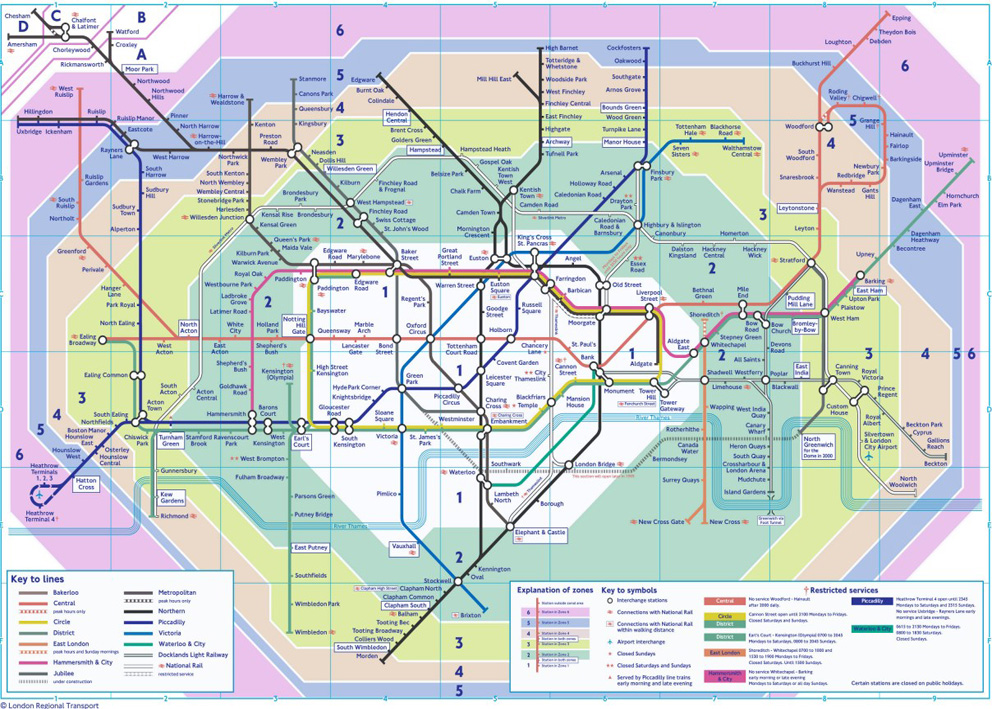

In [1]:
from IPython.display import Image
Image(filename='tube-peg.jpg')

## Extracting Foursquare data

A simple Google search provided me with the coordinates of the 4 neighbourboods in London that I want to compare.

The Foursquare data was extracted for the 100 closest venues to each of the 4 reference points.



In [4]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib as plt
import matplotlib.colors as colors

In [5]:
locations = pd.read_csv('FINAL Locations Leone Project.csv', header='infer')
locations

,Otl_Name,Longitude,Latitude
0,PUTNEY,-0.215469,51.464559
1,CHANCERY LANE,-0.112140,51.518020
2,MAYFAIR,-0.142709,51.507447
3,HAMMERSMITH,-0.228138,51.492439


In [2]:
# My FourSquare Credentials - Not to be shared!
CLIENT_ID = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx' 
CLIENT_SECRET = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
VERSION = '20180605'

In [25]:
PUTNEY = [51.46455891,-0.21546936]
CHANCERY_LANE = [51.51802011,-0.112140126]
MAYFAIR = [51.50744736,-0.142708972]
HAMMERSMITH = [51.49243882, -0.228137954]

LIMIT = 1000
radius = 7500

In [26]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [27]:
def get_nearby_venues(coords):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, coords[0], coords[1], radius, LIMIT)
    results = requests.get(url).json()
    venues=results['response']['groups'][0]['items']
    nearby_venues = json_normalize(venues)
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues = nearby_venues.loc[:, filtered_columns]
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    return nearby_venues

In [28]:
putney_venues = get_nearby_venues(PUTNEY);
chancery_lane_venues = get_nearby_venues(CHANCERY_LANE);
mayfair_venues = get_nearby_venues(MAYFAIR);
hammersmith_venues = get_nearby_venues(HAMMERSMITH);

In [34]:
putney_venues.to_csv('putney_venues.csv')
chancery_lane_venues.to_csv('chancery_lane_venues.csv')
mayfair_venues.to_csv('mayfair_venues.csv')
hammersmith_venues.to_csv('hammersmith_venues.csv')

## Starting analysis

Firstly starting off by creating a single dataframe from the 4 venues. This means that the dataframe now consists of 400 entries of venues around the 4 areas.

Simply looking at total venues of each category and looking at the venues that occur most.
We see that Hotels, Parks and Pizza places are the most common venues around the area. With Pizza places in the top 3, no wonder these areas are my favourite!!


In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib as plt
import matplotlib.colors as colors

In [2]:
chan = pd.read_csv('chancery_lane_venues.csv', header='infer')
chan.head()

,Unnamed: 0,name,categories,lat,lng
0,0,Catalyst Cafe,Coffee Shop,51.519705,-0.112052
1,1,Scarfes Bar,Hotel Bar,51.517813,-0.118184
2,2,Rosewood London,Hotel,51.517468,-0.117810
3,3,Apex Temple Court Hotel,Hotel,51.513738,-0.108878
4,4,The Hoxton Holborn,Hotel,51.517145,-0.122030


In [3]:
hamm = pd.read_csv('hammersmith_venues.csv', header='infer')
mayf = pd.read_csv('mayfair_venues.csv', header='infer')
putn = pd.read_csv('putney_venues.csv', header='infer')

In [4]:
chan['area'] = 'Chancery Lane'
hamm['area'] = 'Hammersmith'
mayf['area'] = 'Mayfair'
putn['area'] = 'Putney'

In [5]:
base = chan.append(hamm).append(mayf).append(putn)
base.tail()

,Unnamed: 0,name,categories,lat,lng,area
95,95,The Ginger Pig,Butcher,51.454584,-0.139801,Putney
96,96,BVLGARI Hotel London,Hotel,51.501467,-0.163548,Putney
97,97,Shirley Sherwood Gallery,Art Gallery,51.474788,-0.292470,Putney
98,98,L'ETO Caffè,Café,51.498651,-0.156969,Putney
99,99,Mari Vanna,Russian Restaurant,51.501793,-0.162479,Putney


In [6]:
categ = base.groupby('categories').count()
categ.sort_values('name', ascending=False)


,Unnamed: 0,name,lat,lng,area
categories,,,,,
Hotel,38,38,38,38,38
Park,24,24,24,24,24
Pizza Place,14,14,14,14,14
Theater,13,13,13,13,13
Garden,11,11,11,11,11
Café,11,11,11,11,11
Indian Restaurant,10,10,10,10,10
Coffee Shop,10,10,10,10,10
Cocktail Bar,10,10,10,10,10


In [7]:
print('There are {} unique categories.'.format(len(base['categories'].unique())))

There are 94 unique categories.


## Plotting the venues around each area on a Map

To get a feeling of where these venues are located around each of the 4 areas, I have plotted them on a map to see how they are distributed. 


On the map below, you will see 
<font color = 'blue'>
Chancery Lane in Blue,



<font color = 'green'>
Mayfair in Green,
    
    
<font color = 'red'>
Putney in Red

<font color = 'black'>
and

<font color = 'orange'>
Hammersmith in Orange




<font color = 'black'>
It is clear to see that the venues are more widely spread in the zone 2/3 areas (Hammersmith and Putney) than the two zone 1 areas (Mayfair and Chancery Lane).
This is because in Central London everything is quite close to one another, so the points on the map seem intuative to me.

In [8]:
import folium
lat1 = list(base["lat"])
lon1 = list(base["lng"])
area = list(base["area"])

map_subset = folium.Map(location=[51.5074, -0.1278]
                    , zoom_start = 12
                    ,tiles='cartodbpositron'    #this is a more minimalist-looking map than the default
                   )

In [9]:
#definition of the condition for color coding
def color_producer(area):
    if area == 'Chancery Lane': 
        return 'blue'
    elif area == 'Mayfair': 
        return 'green'
    elif area == 'Putney': 
        return 'red'
    elif area == 'Hammersmith': 
        return 'orange'
    else:
        return 'black' 

In [10]:
points = folium.map.FeatureGroup()
for lt, ln, area in zip(lat1, lon1, area):
    points.add_child(folium.CircleMarker([lt,ln], radius=1, color=color_producer(area),fill_color=color_producer(area)))

map_subset.add_child(points)


## Plotting the most common venues on a Map

From the analysis done in the first step, we were able to see the most common venues with Hotels, Parks and Pizza Places being the most common places. The 9 most common places are seen on the map below in corresponding colors.
<font color = 'green'>
 Hotel
<font color = 'orange'>
Park
    .
<font color = 'blue'>
Pizza Place
<font color = 'yellow'>
Theatre
<font color = 'pink'>
Garden
<font color = 'red'>
Café
<font color = 'purple'>
Indian Restaurant
<font color = 'gray'>
Coffee Shop
<font color = 'lightgray'>
Cocktail Bar



In [11]:
# 55.3781° N, 3.4360° W
import folium
lat1 = list(base["lat"])
lon1 = list(base["lng"])
categories = list(base["categories"])

tor_map_subset = folium.Map(location=[51.5074, -0.1278]
                    , zoom_start = 12
                    ,tiles='cartodbpositron'    #this is a more minimalist-looking map than the default
                   )

In [12]:
#definition of the condition for color coding
def color_producer(categories):
    if categories == 'Hotel':
        return 'green'
    elif categories == 'Park': 
        return 'orange'
    elif categories == 'Pizza Place': 
        return 'blue'
    elif categories == 'Theater': 
        return 'yellow'
    elif categories == 'Garden': 
        return 'pink'
    
    elif categories == 'Café': 
        return 'red'
    elif categories == 'Indian Restaurant': 
        return 'purple'
    elif categories == 'Coffee Shop': 
        return 'gray'
    elif categories == 'Cocktail Bar': 
        return 'lightgray'

    else:
        return 'white' 
    


In [13]:
points = folium.map.FeatureGroup()
for lt, ln, categories in zip(lat1, lon1, categories):
    points.add_child(folium.CircleMarker([lt,ln], radius=1, color=color_producer(categories),fill_color=color_producer(categories)))

tor_map_subset.add_child(points)


## Start k-means 2 buckets to see which areas are similar in nature


The following section applies a k-means test to the 4 neighbourhoods to see if there are similar clusters and which areas would be clustered together to note more similar areas.

I applied 2 clusters in order to split the 4 neighbourhoods in to 2 seperate neighbourhoods.

In [14]:
from sklearn.cluster import KMeans

In [15]:
base.head()

,Unnamed: 0,name,categories,lat,lng,area
0,0,Catalyst Cafe,Coffee Shop,51.519705,-0.112052,Chancery Lane
1,1,Scarfes Bar,Hotel Bar,51.517813,-0.118184,Chancery Lane
2,2,Rosewood London,Hotel,51.517468,-0.117810,Chancery Lane
3,3,Apex Temple Court Hotel,Hotel,51.513738,-0.108878,Chancery Lane
4,4,The Hoxton Holborn,Hotel,51.517145,-0.122030,Chancery Lane


In [16]:
# set number of clusters
kclusters = 2

base_group1 = base.drop('area', 1)

In [17]:
base.groupby('area').count()

,Unnamed: 0,name,categories,lat,lng
area,,,,,
Chancery Lane,100,100,100,100,100
Hammersmith,100,100,100,100,100
Mayfair,100,100,100,100,100
Putney,100,100,100,100,100


In [18]:
# one hot encoding
base_onehot1 = pd.get_dummies(base[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
base_onehot1['area'] = base['area'] 

# move neighborhood column to the first column
fixed_columns = [base_onehot1.columns[-1]] + list(base_onehot1.columns[:-1])
base_onehot1 = base_onehot1[fixed_columns]

base_onehot1.head()

,area,Art Gallery,Art Museum,Athletics & Sports,Bakery,Beer Store,Bookstore,Botanical Garden,Boutique,Boxing Gym,...,Thai Restaurant,Theater,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Chancery Lane,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chancery Lane,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Chancery Lane,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chancery Lane,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chancery Lane,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
base_grouped1 = base_onehot1.groupby('area').mean().reset_index()
base_grouped1.head()

,area,Art Gallery,Art Museum,Athletics & Sports,Bakery,Beer Store,Bookstore,Botanical Garden,Boutique,Boxing Gym,...,Thai Restaurant,Theater,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Chancery Lane,0.01,0.03,0.00,0.03,0.00,0.03,0.00,0.01,0.01,...,0.01,0.06,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00
1,Hammersmith,0.01,0.01,0.01,0.00,0.00,0.01,0.04,0.01,0.00,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02
2,Mayfair,0.02,0.03,0.00,0.02,0.00,0.04,0.00,0.02,0.00,...,0.01,0.04,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00
3,Putney,0.03,0.01,0.00,0.01,0.01,0.01,0.02,0.01,0.00,...,0.01,0.02,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01


In [20]:
#print each neighbourhood with their top 5 venues
num_top_venues = 4

for hood in base_grouped1['area']:
    print("----"+hood+"----")
    temp = base_grouped1[base_grouped1['area'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Chancery Lane----
               venue  freq
0              Hotel  0.09
1            Theater  0.06
2        Coffee Shop  0.05
3  Indian Restaurant  0.04


----Hammersmith----
              venue  freq
0             Hotel  0.13
1              Park  0.07
2       Pizza Place  0.04
3  Botanical Garden  0.04


----Mayfair----
       venue  freq
0      Hotel  0.13
1    Theater  0.04
2       Park  0.04
3  Bookstore  0.04


----Putney----
         venue  freq
0         Park  0.12
1         Café  0.06
2  Pizza Place  0.04
3  Coffee Shop  0.04




In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [22]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted1 = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted1['area'] = base_grouped1['area']

for ind in np.arange(base_grouped1.shape[0]):
    neighborhoods_venues_sorted1.iloc[ind, 1:] = return_most_common_venues(base_grouped1.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted1.head()

,area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chancery Lane,Hotel,Theater,Coffee Shop,Steakhouse,Cocktail Bar,Indian Restaurant,Sushi Restaurant,Pizza Place,Bakery,Art Museum
1,Hammersmith,Hotel,Park,Botanical Garden,Garden,Pizza Place,Japanese Restaurant,Breakfast Spot,Café,Ice Cream Shop,Science Museum
2,Mayfair,Hotel,Theater,Bookstore,Park,Steakhouse,Art Museum,Lounge,Pizza Place,Cocktail Bar,Department Store
3,Putney,Park,Café,Pizza Place,Coffee Shop,Japanese Restaurant,Garden,Hotel,Ice Cream Shop,Museum,Art Gallery


In [23]:
# set number of clusters
kclusters = 2

base_grouped_clustering1 = base_grouped1.drop('area', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(base_grouped_clustering1)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 1])

In [24]:
# add clustering labels
neighborhoods_venues_sorted1.insert(0, 'Cluster Labels', kmeans.labels_)

base_merged1 = base

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
base_merged1 = base_merged1.join(neighborhoods_venues_sorted1.set_index('area'), on='area')

base_merged1.head() # check the last columns!

,Unnamed: 0,name,categories,lat,lng,area,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Catalyst Cafe,Coffee Shop,51.519705,-0.112052,Chancery Lane,0,Hotel,Theater,Coffee Shop,Steakhouse,Cocktail Bar,Indian Restaurant,Sushi Restaurant,Pizza Place,Bakery,Art Museum
1,1,Scarfes Bar,Hotel Bar,51.517813,-0.118184,Chancery Lane,0,Hotel,Theater,Coffee Shop,Steakhouse,Cocktail Bar,Indian Restaurant,Sushi Restaurant,Pizza Place,Bakery,Art Museum
2,2,Rosewood London,Hotel,51.517468,-0.117810,Chancery Lane,0,Hotel,Theater,Coffee Shop,Steakhouse,Cocktail Bar,Indian Restaurant,Sushi Restaurant,Pizza Place,Bakery,Art Museum
3,3,Apex Temple Court Hotel,Hotel,51.513738,-0.108878,Chancery Lane,0,Hotel,Theater,Coffee Shop,Steakhouse,Cocktail Bar,Indian Restaurant,Sushi Restaurant,Pizza Place,Bakery,Art Museum
4,4,The Hoxton Holborn,Hotel,51.517145,-0.122030,Chancery Lane,0,Hotel,Theater,Coffee Shop,Steakhouse,Cocktail Bar,Indian Restaurant,Sushi Restaurant,Pizza Place,Bakery,Art Museum


In [25]:
base_merged1.to_csv('base_merged1.csv')

In [26]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[51.70, -1.4], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(base_merged1['lat'], base_merged1['lng'], base_merged1['area'], base_merged1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The conclusion of the k-means test is that:
    
<font color = 'blue'>
Chancery Lane 
<font color = 'black'>
and
<font color = 'green'>
Mayfair 
<font color = 'black'>   
were clustered as similar areas (cluster0)
     
    
     
<font color = 'orange'>
Hammersmith
<font color = 'black'>    
and
<font color = 'red'>   
Putney
<font color = 'black'>   
were clustered as similar areas (cluster1)
    
This was fairly expected as the two zone1 neighbourhoods were clustered together.

## Draw box plots to compare areas and venues

In [55]:
base['tag']=1

In [62]:
base_tag = pd.pivot_table(base,index=["area"],values=["tag"],
               columns=["categories"],aggfunc=[np.sum],fill_value=0)
base_tag

sum                                                  \
                      tag                                                   
categories    Art Gallery Art Museum Athletics & Sports Bakery Beer Store   
area                                                                        
Chancery Lane           1          3                  0      3          0   
Hammersmith             1          1                  1      0          0   
Mayfair                 2          3                  0      2          0   
Putney                  3          1                  0      1          1   

                                                                             \
                                                                              
categories    Bookstore Botanical Garden Boutique Boxing Gym Breakfast Spot   
area                                                                          
Chancery Lane         3                0        1          1              0   
Hammersmith           1                4        1          0              3   
Mayfair               4                0        2          0              0   
Putney                1                2        1          0              2   

               ...                                                 \
               ...                                                  
categories     ... Thai Restaurant Theater Toy / Game Store Trail   
area           ...                                                  
Chancery Lane  ...               1       6                1     0   
Hammersmith    ...               1       1                0     0   
Mayfair        ...               1       4                1     0   
Putney         ...               1       2                0     1   

                                                                           \
                                                                            
categories    Vegetarian / Vegan Restaurant Whisky Bar Wine Bar Wine Shop   
area                                                                        
Chancery Lane                             0          1        1         0   
Hammersmith                               0          0        0         0   
Mayfair                                   0          0        1         1   
Putney                                    1          0        0         0   

                                         
                                         
categories    Women's Store Yoga Studio  
area                                     
Chancery Lane             0           0  
Hammersmith               0           2  
Mayfair                   0           0  
Putney                    1           1  

[4 rows x 94 columns]

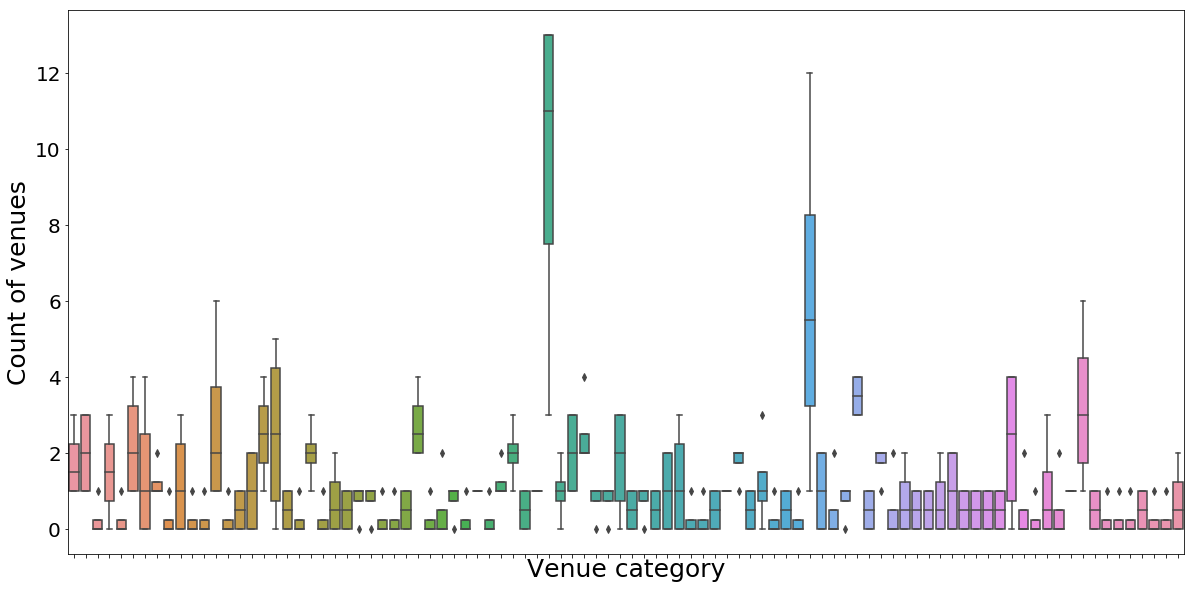

In [67]:
import matplotlib.pyplot as pltt
import seaborn as sns

pltt.figure(figsize=(20, 10))
pltt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = base_tag)
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Venue category', fontsize=25)
ax.tick_params(labelsize=20)
pltt.xticks(rotation=45, ha='right', visible=False)

pltt.show()

Looking at this graph from left to right, the first point that stands out is the Orange venue with a max of 6 this is the 'Cafe' category.

Then 'Hotel' (green), where max=13 median=11, min=3
Thereafter 'Park' (blue) where max=12 median=5.5, min=1
Thereafter 'Pizza place' (purple) and 'Theatre'(pink)  


In [64]:
base_tag1 = pd.pivot_table(base,index=["categories"],values=["tag"],
               columns=["area"],aggfunc=[np.sum],fill_value=0)
base_tag1

sum                           
                                        tag                           
area                          Chancery Lane Hammersmith Mayfair Putney
categories                                                            
Art Gallery                               1           1       2      3
Art Museum                                3           1       3      1
Athletics & Sports                        0           1       0      0
Bakery                                    3           0       2      1
Beer Store                                0           0       0      1
Bookstore                                 3           1       4      1
Botanical Garden                          0           4       0      2
Boutique                                  1           1       2      1
Boxing Gym                                1           0       0      0
Breakfast Spot                            0           3       0      2
Burger Joint                              0           1       0      0
Butcher                                   0           0       0      1
Café                                      1           3       1      6
Canal                                     1           0       0      0
Cheese Shop                               1           0       1      0
Clothing Store                            2           0       2      0
Cocktail Bar                              4           2       3      1
Coffee Shop                               5           1       0      4
Concert Hall                              0           1       0      1
Cricket Ground                            0           1       0      0
Department Store                          2           2       3      1
Dessert Shop                              0           1       0      0
English Restaurant                        0           1       0      2
Event Space                               1           0       1      0
Exhibit                                   0           1       1      1
Farmers Market                            0           1       1      1
Fish & Chips Shop                         0           0       0      1
Food & Drink Shop                         0           0       0      1
French Restaurant                         1           0       1      0
Garden                                    2           4       2      3
...                                     ...         ...     ...    ...
Performing Arts Venue                     2           0       0      0
Perfume Shop                              0           1       1      1
Pizza Place                               3           4       3      4
Playground                                0           1       0      1
Plaza                                     2           2       2      1
Pub                                       0           0       0      2
Restaurant                                0           1       0      2
Roof Deck                                 0           1       1      0
Russian Restaurant                        0           1       0      1
Scenic Lookout                            2           0       1      0
Science Museum                            0           2       0      2
Seafood Restaurant                        0           1       1      0
Shopping Plaza                            1           0       1      0
Social Club                               0           1       0      1
Spa                                       0           1       1      0
Steakhouse                                4           1       4      0
Street Food Gathering                     2           0       0      0
Supermarket                               0           1       0      0
Sushi Restaurant                          3           0       1      0
Tennis Stadium                            0           0       0      2
Thai Restaurant                           1           1       1      1
Theater                                   6           1       4 

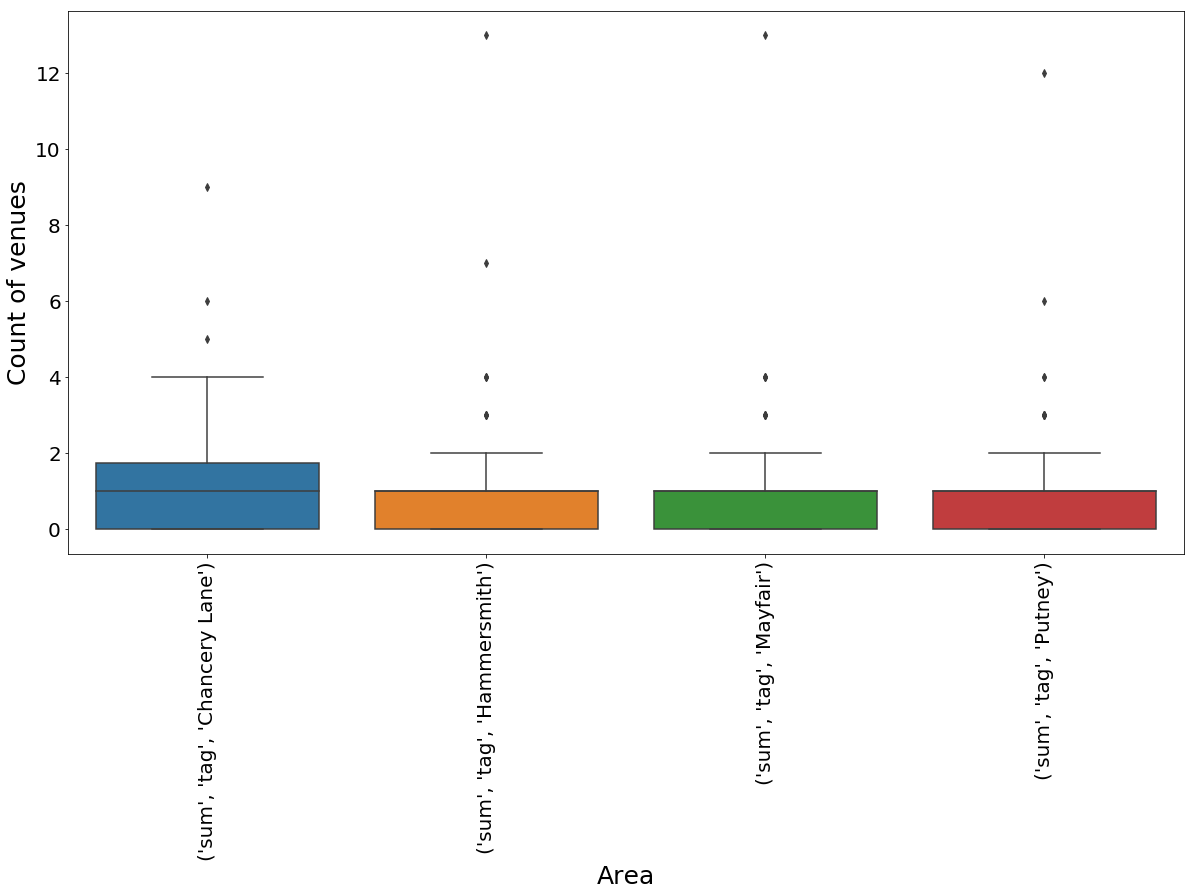

In [70]:
import matplotlib.pyplot as pltt
import seaborn as sns

pltt.figure(figsize=(20, 10))
pltt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = base_tag1)
ax.set_ylabel('Count of venues', fontsize=25)
ax.set_xlabel('Area', fontsize=25)
ax.tick_params(labelsize=20)
# pltt.xticks(rotation=45, ha='right')

pltt.show()

# Results

*********

MAPS:

*********

Chancery Lane and Mayfair are zone 1 and more central.

Hammersmith and Putney are zones 2 and 3 respectively and are more west out of central London.

The maps showed that the zone 1 neighbourhoods had venues more closely situated to the points of interest.

The other two neighbourhoods had venues that were more spaced out.

On the maps we also saw that Hotels, Parks and Pizza places are the most common venues over all 4 neighbourhoods.

*********

K-MEANS

*********

The preparation for k-means showed us the most common venues for each of the neighbourhoods. They can be seen as follows:


<font color = 'blue'>
Chancery Lane has mostly:
    
    Hotels(9)
    Theatres(6)
    Coffee Shops(5)
    
    

<font color = 'orange'>
    
Hammersmith has mostly:

    Hotels(13)
    Parks(4)
    Pizza places (3)

<font color = 'green'>
    
Mayfair has mostly:

    Hotels(13)
    Parks(4)
    Theatres(4)

<font color = 'red'>
    
Putney has mostly:

    Parks(12)
    Cafe's (6) 
    Pizza Places(4)

<font color = 'black'>  
Following the k-means results:



<font color = 'blue'>
Chancery Lane 
<font color = 'black'>
and
<font color = 'green'>
Mayfair 
<font color = 'black'>   
were clustered as similar areas (cluster0)
     
    
     
<font color = 'orange'>
Hammersmith
<font color = 'black'>    
and
<font color = 'red'>   
Putney
<font color = 'black'>   
were clustered as similar areas (cluster1)
    
This made intuative sense because of the physical location of the first two being zone 1 in central London

*********

Box plots

*********

We can clearly see that Hotels, Parks and Pizza places are most common venues.


## Conclusion

As one could have suspected, the two central London neighbourhoods are more similar than the outskirts.

Looking at the two clusters and the most common venues, I would prefer the outskirts due to them having more parks and perhaps a bit of extra time to wander around the areas!

If ever you visit London, I hope you would have a wonderful time in any of these neighbourhoods :)